In [25]:
from urllib.request import urlopen, Request

In [54]:
from bs4 import BeautifulSoup

In [55]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [56]:
import pandas as pd

In [70]:
import matplotlib.pyplot as plt

video_url = https://www.youtube.com/watch?v=o-zM8onpQZY

In [120]:
finviz_url = 'https://finviz.com/quote.ashx?t='

In [121]:
tick = pd.read_csv('EQUITY_L.csv')

In [122]:
tick.tail() # this is for my experiment

,SYMBOL,NAME OF COMPANY,SERIES,DATE OF LISTING,PAID UP VALUE,MARKET LOT,ISIN NUMBER,FACE VALUE,Unnamed: 8,YahooEquiv,Yahoo_Equivalent_Code
1660,ZODJRDMKJ,Zodiac JRD- MKJ Limited,EQ,19-Jul-95,10,1,INE077B01018,10,.NS,ZODJRDMKJ.NS,"'ZODJRDMKJ.NS',"
1661,ZOTA,Zota Health Care LImited,EQ,19-Aug-19,10,1,INE358U01012,10,.NS,ZOTA.NS,"'ZOTA.NS',"
1662,ZUARI,Zuari Agro Chemicals Limited,EQ,27-Nov-12,10,1,INE840M01016,10,.NS,ZUARI.NS,"'ZUARI.NS',"
1663,ZUARIGLOB,Zuari Global Limited,BE,12-Apr-95,10,1,INE217A01012,10,.NS,ZUARIGLOB.NS,"'ZUARIGLOB.NS',"
1664,ZYDUSWELL,Zydus Wellness Limited,EQ,13-Nov-09,10,1,INE768C01010,10,.NS,ZYDUSWELL.NS,'ZYDUSWELL.NS'


In [123]:
#back to the video

In [124]:
tickers = ['AMZN', 'GOOG', 'FB']

In [125]:
news_tables = {}
for ticker in tickers:
    url = finviz_url + ticker
    
    req = Request(url = url, headers={'user-agent':
                                     'my-app'})
    response = urlopen(req)
    
    html = BeautifulSoup(response, 'html')
    
    news_table = html.find(id='news-table')
    news_tables[ticker] = news_table
 #   break
    
    

In [126]:
#pri

In [127]:
#print(news_tables)

amzn_data = news_tables['AMZN']
amzn_rows = amzn_data.findAll('tr')
#print(amzn_rows)

for index, row in enumerate(amzn_rows):
    title = row.a.text
    timestamp = row.td.text
    print(timestamp + " " + title)
    

In [128]:
# better function

In [129]:
parsed_data = []

for ticker, news_table in news_tables.items():
    for row in news_table.findAll('tr'):
        
        title = row.a.text
        date_data = row.td.text.split(' ')
        
        if len(date_data) == 1:
            time = date_data[0]
        else:
            date = date_data[0]
            time = date_data[1]
            
        parsed_data.append([ticker, date, time, title])
        

In [130]:
#print(parsed_data)

In [131]:
# goal is to take these titles and apply sentiment analysis

In [132]:
# Using nltk vader

In [133]:
df = pd.DataFrame(parsed_data, columns=['ticker', 'date', 'time', 'title'])

In [134]:
print(df.head())

  ticker       date       time  \
0   AMZN  Apr-15-21  10:33PM     
1   AMZN  Apr-15-21  06:38PM     
2   AMZN  Apr-15-21  06:17PM     
3   AMZN  Apr-15-21  05:54PM     
4   AMZN  Apr-15-21  04:48PM     

                                               title  
0  Dow Jones Futures: Stock Market Rally Rebounds...  
1  Is Kroger Stock A Buy Right Now? Here's What E...  
2  U.S. Exposes Hackers Helpers to Punish Russian...  
3  Jeff Bezos Promises to do Better Job for Amazo...  
4  Jeff Bezos Just Revealed Amazon Prime's Latest...  


In [135]:
vader = SentimentIntensityAnalyzer()

In [136]:
print(df['title'])

0      Dow Jones Futures: Stock Market Rally Rebounds...
1      Is Kroger Stock A Buy Right Now? Here's What E...
2      U.S. Exposes Hackers Helpers to Punish Russian...
3      Jeff Bezos Promises to do Better Job for Amazo...
4      Jeff Bezos Just Revealed Amazon Prime's Latest...
                             ...                        
295    Muslim Advocacy Group Sue Facebook For Failure...
296    Gupshup CEO on $100M funding: It accelerates o...
297    Is Shopify Stock A Buy As New Chart Pattern Fo...
298    U.S.-based Muslim advocacy group sues Facebook...
299    FTC slams Facebook as personal social networki...
Name: title, Length: 300, dtype: object


In [137]:
f = lambda title: vader.polarity_scores(title)['compound']
df['compound'] = df['title'].apply(f)
df['date'] = pd.to_datetime(df.date).dt.date



In [142]:
plt.figure(figsize =(20,15))

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

In [143]:
mean_df = df.groupby(['ticker', 'date']).mean()
mean_df = mean_df.unstack()
mean_df = mean_df.xs('compound', axis="columns").transpose()



In [144]:
print(mean_df)

ticker          AMZN        FB      GOOG
date                                    
2021-04-08       NaN -0.059460       NaN
2021-04-09       NaN -0.078026 -0.028062
2021-04-10       NaN  0.125000  0.287500
2021-04-11       NaN       NaN  0.000000
2021-04-12  0.032800  0.078682  0.187410
2021-04-13  0.064387  0.077247  0.163956
2021-04-14  0.026272  0.055956  0.056244
2021-04-15  0.154535  0.147435  0.114027
2021-04-16       NaN -0.072450 -0.526700


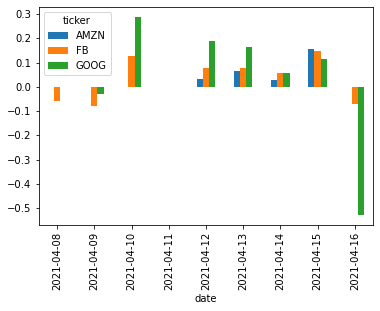

In [145]:
mean_df.plot(kind='bar')
plt.show()